# Classify the PCB and calculate the match score

### get classification result from Custom Vision Service

In [1]:
# importing the requests library 
import requests 
import json
# api-endpoint
filename = 'test'
URL = "https://southcentralus.api.cognitive.microsoft.com/customvision/v2.0/Prediction/664faead-9f74-44cc-96fb-aee26362838f/image"
headers = {'content-type': 'application/octet-stream', 'Prediction-Key': '[key]'}
data = open('images/' + filename + '.jpg', 'rb')
# sending get request and saving the response as response object 
r = requests.post(url = URL, data = data, headers = headers)

result = json.loads(r.text)['predictions'][0]
print("Result is:%s"%result) 

Result is:{'tagId': 'd9f19227-b9a5-42aa-91b2-14eec2ab3a73', 'probability': 0.9967859, 'tagName': 'amd_02'}


### Calculate the match score
reference: https://medium.com/machine-learning-world/feature-extraction-and-similar-image-search-with-opencv-for-newbies-3c59796bf774

github: https://github.com/creotiv/computer_vision/tree/master/opencv_image_search

In [2]:
import cv2
import numpy as np
import scipy
from scipy.misc import imread
#from imageio.imread import imread
import pickle as pickle
import random
import os
import matplotlib.pyplot as plt

prob = result['probability']
tag = result['tagName']
match_status = 'match'
if prob< 0.3:
    print(prob)
    print('not recognized')
    match_status = 'not_matched'
else:
    imageA= imread('images/' + tag + '.jpg', mode="RGB") #get the standard image according to its category
    imageB = imread('images/' + filename + '.jpg', mode='RGB')
    alg = cv2.KAZE_create()
        # Dinding image keypoints
    kpsA = alg.detect(imageA)
    kpsB = alg.detect(imageB)
    kpsA = sorted(kpsA, key=lambda x: -x.response)[:32]
    kpsB = sorted(kpsB, key=lambda x: -x.response)[:32]
    kpsA, dscA = alg.compute(imageA, kpsA)
    kpsB, dscB = alg.compute(imageB, kpsB)
    dscA = dscA.flatten()
    dscB = dscB.flatten()
    vA = dscA.reshape(1, -1)
    vB = dscB.reshape(1, -1)
    img_distances = scipy.spatial.distance.cdist(vA, vB, 'cosine').reshape(-1)
    #nearest_ids = np.argsort(img_distances)[:3].tolist()
    print('Match score: ', 1-img_distances)
    if 1-img_distances > 0.85:
        print('exactly same type')
    else:
        print('out of category')
        match_status = 'not_matched'

/anaconda/envs/py35/lib/python3.5/site-packages/ipykernel_launcher.py:19: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
/anaconda/envs/py35/lib/python3.5/site-packages/ipykernel_launcher.py:20: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.


Match score:  [0.70246559]
out of category


### plot the result

/anaconda/envs/py35/lib/python3.5/site-packages/ipykernel_launcher.py:1: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  """Entry point for launching an IPython kernel.
/anaconda/envs/py35/lib/python3.5/site-packages/ipykernel_launcher.py:2: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  


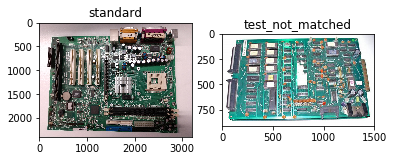

In [3]:
standard = imread('images/' + tag + '.jpg', mode="RGB") #get the standard image according to its category
test = imread('images/' + filename + '.jpg', mode='RGB')

plt.subplot(1,2,1)
plt.title('standard')
plt.imshow(standard)
 
plt.subplot(1,2,2)
plt.title('test_' + match_status)
plt.imshow(test)



### QRcode

In [48]:
# 导入所需工具包
from pyzbar import pyzbar
import argparse
import cv2

image = test

# find the qrcodes and barcodes in the image
barcodes = pyzbar.decode(image)

[INFO] Found QRCODE barcode: 8S5B20N00291ZZPF79WH0MG
[INFO] Found CODE128 barcode: 54E1ADA0BA93


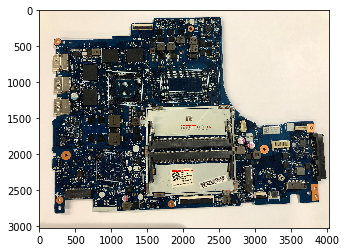

In [49]:
import matplotlib.pyplot as plt

for barcode in barcodes:
# draw the qrcodes and barcodes
 (x, y, w, h) = barcode.rect
 cv2.rectangle(image, (x, y), (x + w, y + h), (255, 0, 0), 5)


 barcodeData = barcode.data.decode("utf-8")
 barcodeType = barcode.type

 text = "{} ({})".format(barcodeData, barcodeType)
 cv2.putText(image, text, (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX,
  0.5, (255, 0, 0), 2)

 print("[INFO] Found {} barcode: {}".format(barcodeType, barcodeData))

# plot and save
plt.imshow(image)
plt.savefig('qrresult.jpg', dpi=300)

In [52]:
#compare the code with standard code
for barcode in barcodes:
    if barcode.type == 'QRCODE':
        code = barcode.data.decode('utf-8')
        if code[0:2] == '8S':
            if code[2:-7] == '5B20N00291ZZPF':
                print('QRcode match!')
            else:
                print('fake QRcode!')

QRcode match!
